In [ ]:
import numpy as np
from numpy import concatenate
import pandas as pd
import tensorflow as tf
import keras
import math
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.layers import Flatten
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras.layers import ConvLSTM2D
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
%matplotlib inline

In [ ]:
solar_data = pd.read_csv('train.csv',encoding='utf-8')

In [ ]:
solar_data.drop(['Day', 'Hour','Minute'], axis='columns', inplace=True)

In [ ]:
def create_dataset(solar_data, index):
    dataX, dataY = [], []
    for i in range(0,48*7):
        dataX.append(list(np.array(solar_data.loc[index+i].tolist())))
    for i in range(48*7,48*7+48*2):
        dataY.append(solar_data.loc[index+i,'TARGET'])
    return np.array(dataX), np.array(dataY)

In [ ]:
# 데이터셋 생성
input_data, output_data = [], []

last_index = 3*365*48-48*9
list_index = list(range(0,last_index,48))

# last_index = 3*365*48 - 432
# list_index = list(0:last_index,1))

for i in list_index:
    X, Y = create_dataset(solar_data,i)
    input_data.append(X)
    output_data.append(Y)

In [ ]:
input_array = np.reshape(np.array(input_data), (1086, -1))
output_array = np.reshape(np.array(output_data),(1086,-1))

In [ ]:
input_array.shape, output_array.shape

((1086, 2016), (1086, 96))

In [ ]:
# 데이터셋 분배
train_x, test_x, train_y, test_y = train_test_split(input_array, output_array, test_size = 0.1,shuffle = False)
train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, test_size=0.1,shuffle=False)

# x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))
# train_x = train_x.reshape((train_x.shape[0], 7, 1, 48, 6))

In [ ]:
print(train_x.shape,train_y.shape)

(879, 2016) (879, 96)


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.multioutput import MultiOutputRegressor

GBR_model = GradientBoostingRegressor(learning_rate=0.1, n_estimators=500, max_depth=3)
RFR_model = RandomForestRegressor(n_estimators=500, max_features=0.25)
SVR_model = SVR(kernel = 'rbf')
ETR_model = ExtraTreesRegressor(n_estimators=1000)
LR_model = LinearRegression()

models = [GBR_model, RFR_model, SVR_model, ETR_model, LR_model]

def run_model(model_list, train_x, test_x, train_y, test_y):

    for model in models:
        mor_model = MultiOutputRegressor(model)
        mor_model.fit(train_x, train_y)
        y_pred = mor_model.predict(test_x)
        print(str(model).split('(')[0] + '_score :', r2_score(y_pred, test_y))
        
        

run_model(models, train_x, test_x, train_y, test_y)

# SVR

In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.multioutput import MultiOutputRegressor

SVR_model = SVR(kernel = 'rbf')
mor_model = MultiOutputRegressor(SVR_model)
mor_model.fit(train_x, train_y)
y_pred = mor_model.predict(test_x)
r2_score(y_pred, test_y)

-1.5323566921055658

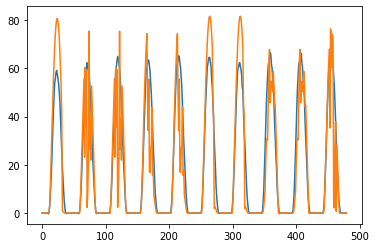

In [ ]:
i = 5
y_pred_list, y_test_list = [], []
for i in range(i):
    for j in range(len(y_pred[i])):
        y_pred_list.append(y_pred[i][j])
        y_test_list.append(test_y[i][j])
plt.plot(range(96 * (i+1)), y_pred_list)
plt.plot(range(96 * (i+1)), y_test_list)
plt.show()

# GradientBoostingRegressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.multioutput import MultiOutputRegressor

GBR_model = GradientBoostingRegressor(learning_rate=0.1, n_estimators=500, max_depth=3)
mor_model = MultiOutputRegressor(GBR_model)
mor_model.fit(train_x, train_y)
y_pred = mor_model.predict(test_x)
r2_score(y_pred, test_y)

KeyboardInterrupt: ignored

In [ ]:
i = 5
y_pred_list, y_test_list = [], []
for i in range(i):
    for j in range(len(y_pred[i])):
        y_pred_list.append(y_pred[i][j])
        y_test_list.append(test_y[i][j])
plt.plot(range(96 * (i+1)), y_pred_list)
plt.plot(range(96 * (i+1)), y_test_list)
plt.show()

# RandomForestRegressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.multioutput import MultiOutputRegressor

RFR_model = RandomForestRegressor(n_estimators=500, max_features=0.25)
mor_model = MultiOutputRegressor(RFR_model)
mor_model.fit(train_x, train_y)
y_pred = mor_model.predict(test_x)
r2_score(y_pred, test_y)

KeyboardInterrupt: ignored

In [ ]:
i = 5
y_pred_list, y_test_list = [], []
for i in range(i):
    for j in range(len(y_pred[i])):
        y_pred_list.append(y_pred[i][j])
        y_test_list.append(test_y[i][j])
plt.plot(range(96 * (i+1)), y_pred_list)
plt.plot(range(96 * (i+1)), y_test_list)
plt.show()

# ExtraTreesRegressor

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import r2_score
from sklearn.multioutput import MultiOutputRegressor

ETR_model = ExtraTreesRegressor(n_estimators=1000)
mor_model = MultiOutputRegressor(ETR_model)
mor_model.fit(train_x, train_y)
y_pred = mor_model.predict(test_x)
r2_score(y_pred, test_y)

KeyboardInterrupt: ignored

In [ ]:
i = 5
y_pred_list, y_test_list = [], []
for i in range(i):
    for j in range(len(y_pred[i])):
        y_pred_list.append(y_pred[i][j])
        y_test_list.append(test_y[i][j])
plt.plot(range(96 * (i+1)), y_pred_list)
plt.plot(range(96 * (i+1)), y_test_list)
plt.show()

# LinearRegression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.multioutput import MultiOutputRegressor

LR_model = LinearRegression()
mor_model = MultiOutputRegressor(LR_model)
mor_model.fit(train_x, train_y)
y_pred = mor_model.predict(test_x)
r2_score(y_pred, test_y)

0.35367694423995255

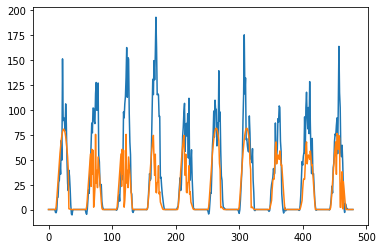

In [ ]:
i = 5
y_pred_list, y_test_list = [], []
for i in range(i):
    for j in range(len(y_pred[i])):
        y_pred_list.append(y_pred[i][j])
        y_test_list.append(test_y[i][j])
plt.plot(range(96 * (i+1)), y_pred_list)
plt.plot(range(96 * (i+1)), y_test_list)
plt.show()